In [8]:
import scipy
mixture, alt_obs, alt_calc, depth_obs, a, b =  0.047 , 1, 6, 255, 6, 249
SEQ_ERROR = 0.01
print ( "Beta binom (clone 0): {}".format ( round ( scipy.stats.betabinom.pmf(alt_obs, depth_obs, a+1, b+1), 2) )  )
print ( "Binom {}C0.5(clone 0): {}".format ( int(depth_obs * mixture), round ( scipy.stats.binom.pmf(n = int(depth_obs * mixture), p = 0.5, k = alt_obs), 2) )  )
print ( "Binom (FP)  {}C{} : {}".format ( depth_obs, alt_obs, round ( scipy.stats.binom.pmf(n = depth_obs, p = SEQ_ERROR, k = alt_obs), 2 )))
print ( "Binom (FP)  {}C0 : {}".format ( depth_obs, round ( scipy.stats.binom.pmf(n = depth_obs, p = SEQ_ERROR, k = 0), 2 )))

Beta binom (clone 0): 0.03
Binom 11C0.5(clone 0): 0.01
Binom (FP)  255C1 : 0.2
Binom (FP)  255C0 : 0.08


1000


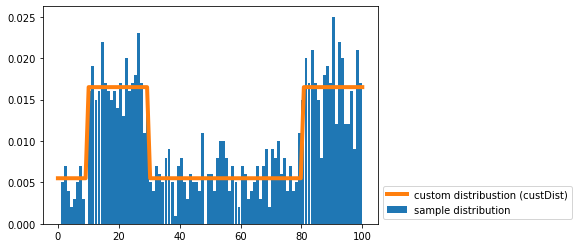

In [14]:
import numpy as np

#funtion
def random_custDist(x0,x1,custDist,size=None, nControl=10**6):
    samples=[]
    nLoop=0
    while len(samples) < size and nLoop < nControl:
        x = np.random.uniform(low=x0,high=x1)
        prop = custDist(x)
        assert prop >=0 and prop <= 1
        if np.random.uniform(low = 0,high = 1) <=prop:
            samples += [x]
        nLoop+=1
    return samples

def custDist(x):
    if x < 10:
        return 0.1
    elif x <= 30:
        return 0.3
    elif x <= 80:
        return 0.1
    else:
        return 0.3
samples = random_custDist(x0 = 1 ,x1 = 100,custDist = custDist, size=1000)
print( len(samples) )

#plot
import matplotlib.pyplot as plt
#hist
bins=np.linspace(x0,x1,int(x1-x0+1))
hist=np.histogram(samples, bins )[0]
hist=hist/np.sum(hist)
plt.bar( (bins[:-1]+bins[1:])/2, hist, width=.96, label='sample distribution')
#dist
grid=np.linspace(x0,x1,100)
discCustDist=np.array([custDist(x) for x in grid]) #distrete version
discCustDist*=1/(grid[1]-grid[0])/np.sum(discCustDist)
plt.plot(grid,discCustDist,label='custom distribustion (custDist)', color='C1', linewidth=4)
#decoration
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()

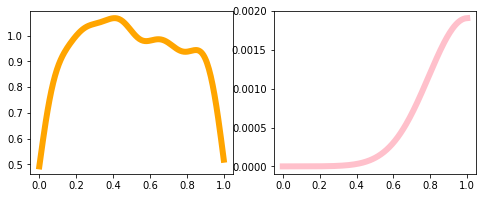

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as kde
dfnum = 1. # between group degrees of freedom
dfden = 48. # within groups degrees of freedom

def kde ( s ):
    import scipy.stats as kde
    kde_function = kde.gaussian_kde( s )
    y = kde_function(x) 
    return y


x = np.linspace(0, 1, 200)
NUM_CLONE = 1000

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 3))

s1 = np.random.uniform (0, 1, NUM_CLONE) 
s2 = np.random.f ( 5 , dfden, 1000)  # f
s2 = np.random.hypergeometric( 50, 10, 5, 1000)  # hypergeometic
y1 = kde(s1)
y2 = kde(s2)

ax[0].plot (x, y1, c = "orange", linewidth = 6)
ax[1].plot (x, y2, c = "pink", linewidth = 6)

fig.show()

In [8]:
s1

array([0.98845535, 0.56047468, 0.1461969 , 0.69571848, 0.51087665,
       0.7906071 , 0.36729403, 0.29011303, 0.23195833, 0.7422153 ,
       0.41245913, 0.79312119, 0.8660505 , 0.34826413, 0.69274717,
       0.82054553, 0.364031  , 0.8487787 , 0.24678712, 0.86434843,
       0.21520385, 0.11742229, 0.60383524, 0.68803394, 0.30050901,
       0.20708121, 0.85444494, 0.36078848, 0.69178244, 0.14238497,
       0.73414787, 0.47734211, 0.49027154, 0.61970231, 0.35834745,
       0.62701702, 0.91198202, 0.60460758, 0.9480237 , 0.69201942,
       0.06786338, 0.15755038, 0.55267933, 0.7827919 , 0.93068919,
       0.39073564, 0.50040002, 0.72700898, 0.20852414, 0.97577818,
       0.06559564, 0.87042276, 0.79143185, 0.44083386, 0.55544303,
       0.82927408, 0.56071268, 0.58215781, 0.97946202, 0.9151122 ,
       0.90088418, 0.323414  , 0.77011375, 0.63625487, 0.1632196 ,
       0.163239  , 0.66359431, 0.99134058, 0.80645449, 0.96691729,
       0.42758323, 0.56646176, 0.45408086, 0.71647516, 0.20170

In [12]:
import pandas as pd
import numpy as np
import glob, os, subprocess

kwargs = {}

kwargs ["INPUT_TSV"] = "/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/250x/M1-2_input.txt"
kwargs ["INPUT_MEMBERSHIP"] = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n1000_250x/parent_0/fp_0.0/axis_-1/M1-2/0/0.input_membership_numerical.txt"
kwargs ["INPUT_MIXTURE"] = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n1000_250x/parent_0/fp_0.0/axis_-1/M1-2/0/0.input_mixture.txt"

kwargs ["CLEMENT_MEMBERSHIP"] = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n1000_250x/parent_0/fp_0.0/axis_-1/M1-2/0/result/CLEMENT_decision.membership.txt"
kwargs ["CLEMENT_MIXTURE"] = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n1000_250x/parent_0/fp_0.0/axis_-1/M1-2/0/result/CLEMENT_decision.mixture.txt"

kwargs ["PYCLONEVI_MEMBERSHIP"] = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n1000_250x/parent_0/fp_0.0/axis_-1/M1-2/0/result/pyclonevi.membership.txt"
kwargs ["PYCLONEVI_MIXTURE"] = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n1000_250x/parent_0/fp_0.0/axis_-1/M1-2/0/result/pyclonevi.mixture.txt"

Moore_VCF = pd.read_csv("/data/project/Alzheimer/CLEMENT/resource/paper/whole_info.txt", sep = "\t")

# column을 소문자로 바꾸기
Moore_VCF.rename(columns=lambda x: x.lower(), inplace=True)

# lexicographically 정렬하기
custom_order = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "X", "Y"]
Moore_VCF['chr_categorical'] = pd.Categorical(Moore_VCF['chr'], categories=custom_order, ordered=True)
Moore_VCF = Moore_VCF.sort_values(by= ['chr_categorical', 'start']).reset_index(drop=True).drop ("chr_categorical", axis = 1)

# 앞에 "chr" 붙여주기
Moore_VCF["pos"]  = "chr" + Moore_VCF["chr"] + "_" + Moore_VCF["start"].astype("str")
Moore_VCF["refalt"] =  Moore_VCF["ref"] + "/" + Moore_VCF["alt"]
Moore_VCF["gene_single"] = Moore_VCF['gene'].str.split(',')
print (Moore_VCF.shape)



input_tsv = pd.read_csv (kwargs["INPUT_TSV"], header = None, sep = "\t")
input_mixture =pd.read_csv (kwargs["INPUT_MIXTURE"], header = None, sep = "\t")
with open(kwargs["INPUT_MEMBERSHIP"], "r") as file:
    input_membership = [int(line.strip()) for line in file]

CLEMENT_mixture =pd.read_csv (kwargs["CLEMENT_MIXTURE"], header = None, sep = "\t")
with open(kwargs["CLEMENT_MEMBERSHIP"], "r") as file:
    CLEMENT_membership = [int(line.strip()) for line in file]

PYCLONEVI_mixture =pd.read_csv (kwargs["PYCLONEVI_MIXTURE"], header = None, sep = "\t")
with open(kwargs["PYCLONEVI_MEMBERSHIP"], "r") as file:
    PYCLONEVI_membership = [int(line.strip()) for line in file]

kwargs ["NUM_MUTATION"] = len(input_membership)
kwargs ["NUM_BLOCK"] = input_mixture.shape[0]
kwargs ["NUM_CLONE"] = input_mixture.shape[1]

(518444, 16)


In [15]:
Moore_VCF

,chr,start,end,ref,alt,depth_count,alt_count,vaf,sample,donorid,tissue,func,gene,pos,refalt,gene_single
0,1,115672,115672,C,T,13,8,0.615385,PD43850u_P50_RTM_B10,PD43850,colon_crypt,intergenic,"OR4F5,LOC729737",chr1_115672,C/T,"[OR4F5, LOC729737]"
1,1,525383,525383,G,A,5,5,1.000000,PD28690bw_APP_3_D5,PD28690,appendix_crypt,intergenic,"OR4F3,OR4F29",chr1_525383,G/A,"[OR4F3, OR4F29]"
2,1,540719,540719,C,G,15,11,0.733333,PD43851t_P52_PRST_F11,PD42565,prostate_acinus,intergenic,"OR4F3,OR4F29",chr1_540719,C/G,"[OR4F3, OR4F29]"
3,1,636994,636994,A,G,23,8,0.347826,PD42569c_lo0031,PD42569,testis_seminiferous_tubule,intergenic,"OR4F29,LOC100133331",chr1_636994,A/G,"[OR4F29, LOC100133331]"
4,1,701989,701989,G,A,16,9,0.562500,PD43851j_P52_DDM_D3,PD42565,small_bowel_crypt,ncRNA_intronic,LOC100288069,chr1_701989,G/A,[LOC100288069]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518439,Y,58968162,58968162,A,C,11,7,0.636364,PD43851f_P53_CLN_B6,PD42565,colon_crypt,intergenic,"NONE,SPRY3",chrY_58968162,A/C,"[NONE, SPRY3]"
518440,Y,58994584,58994584,C,T,38,4,0.105263,PD43851i_P52_CLN_D6,PD42565,colon_crypt,intergenic,"NONE,SPRY3",chrY_58994584,C/T,"[NONE, SPRY3]"
518441,Y,59021669,59021669,A,T,115,8,0.069565,PD43850l_P50_ILM_G4,PD43850,small_bowel_crypt,intergenic,"NONE,SPRY3",chrY_59021669,A/T,"[NONE, SPRY3]"
518442,Y,59023063,59023063,A,T,172,20,0.116279,PD28690bv_APP1_G3,PD28690,appendix_crypt,intergenic,"NONE,SPRY3",chrY_59023063,A/T,"[NONE, SPRY3]"


In [17]:
Moore_VCF.loc[:, ["chr", "start", "end", "refalt", "depth_count", "alt_count", "vaf", "sample", "donorid", "tissue", "func", "gene"]].to_csv ("/data/project/Alzheimer/CLEMENT/resource/paper/whole_info.vepinput.txt", sep = "\t", index = False)

In [1]:
import numpy as np
y_acc, x_acc = [], np.zeros (100, dtype = float)

x = np.linspace(0, 1.6, 101)

t = 0
for i, j in zip(x , TN_prior_cal(x)):
    t = t + j
    y_acc.append (t)

for y_index, y in enumerate ( np.random.uniform(0, np.max(y_acc), 100) ) :
    if y < y_acc [0]:
        x_acc [y_index]  = 0
    for k in range ( len(x_acc) - 1 ):
        if ( y_acc[k] < y ) &  ( y < y_acc[k + 1] ) :
            x_acc [y_index] = k / 100
            break

fp_pool =  sorted (x_acc)

IndentationError: unexpected indent (<ipython-input-1-90f55ad4d225>, line 2)

In [ ]:
Moore_VCF.to_csv ("/data/project/Alzheimer/CLEMENT/resource/paper/whole_info_singlegene.txt", sep = "\t", index = False)

In [24]:
import scipy
score_table = np.zeros ( 2, dtype = "float")

for k in range (kwargs["NUM_MUTATION"]):
    score_table[0] += scipy.spatial.distance.euclidean ( np.array ( input_mixture[input_membership[k]]  ) ,  np.array ( CLEMENT_mixture[CLEMENT_membership[k]]  ) )
    score_table[1] += scipy.spatial.distance.euclidean ( np.array ( input_mixture[input_membership[k]]  ) ,  np.array ( PYCLONEVI_mixture[PYCLONEVI_membership[k]]  ) )

    # for i in range (kwargs["NUM_BLOCK"]):
    #     print ("k = {}\tanswer_clone = {}\tCLEMENT_clone = {}\tpcylonevi_clone = {}".format (k, input_mixture.iloc[i][input_membership[k]], CLEMENT_mixture.iloc[i][CLEMENT_membership[k]], PYCLONEVI_mixture.iloc[i][PYCLONEVI_membership[k]]))

print (score_table)

k = 0	answer_clone = 0.087	CLEMENT_clone = 0.1	pcylonevi_clone = 0.08
k = 1	answer_clone = 0.861	CLEMENT_clone = 0.86	pcylonevi_clone = 0.86
k = 2	answer_clone = 0.069	CLEMENT_clone = 0.1	pcylonevi_clone = 0.08
k = 3	answer_clone = 0.069	CLEMENT_clone = 0.05	pcylonevi_clone = 0.08
k = 4	answer_clone = 0.069	CLEMENT_clone = 0.1	pcylonevi_clone = 0.08
k = 5	answer_clone = 0.069	CLEMENT_clone = 0.05	pcylonevi_clone = 0.08
k = 6	answer_clone = 0.069	CLEMENT_clone = 0.1	pcylonevi_clone = 0.08
k = 7	answer_clone = 0.861	CLEMENT_clone = 0.86	pcylonevi_clone = 0.86
k = 8	answer_clone = 0.861	CLEMENT_clone = 0.86	pcylonevi_clone = 0.86
k = 9	answer_clone = 0.087	CLEMENT_clone = 0.05	pcylonevi_clone = 0.08
k = 10	answer_clone = 0.069	CLEMENT_clone = 0.05	pcylonevi_clone = 0.08
k = 11	answer_clone = 0.069	CLEMENT_clone = 0.1	pcylonevi_clone = 0.08
k = 12	answer_clone = 0.069	CLEMENT_clone = 0.05	pcylonevi_clone = 0.08
k = 13	answer_clone = 0.069	CLEMENT_clone = 0.1	pcylonevi_clone = 0.08
k = 14	a

In [32]:
def out(command): 
    import subprocess
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True, shell=True) 
    return result.stdout.rstrip("\n")


import pandas as pd
import glob, os

#df = pd.read_csv ("/data/project/Alzheimer/YSscript/cle/data/pyclone-vi/3.BioData/Brunner_1D/PD37115b_lo002/input.tsv", sep = "\t")

from natsort import natsorted
INPUT_DIR_LIST = natsorted (  glob.glob("/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/3.BioData/Brunner/Brunner_1D/*") ) 


INPUT_DIR_LIST_SELECTED = []
for k in INPUT_DIR_LIST:
    if os.path.isfile (k) == True:
        if "input" in k.split("/")[-1]:
            SAMPLENAME = k.split("/")[-1].split("_input")[0]                
            INPUT_DIR_LIST_SELECTED.append (k)

INPUT_DIR_LIST = natsorted (  INPUT_DIR_LIST_SELECTED ) 



for INPUT_TSV in INPUT_DIR_LIST:
    OUTPUT_TSV = INPUT_TSV.replace ("Brunner_1D", "Brunner_1D_dedup")
    NUMBER_LINE = int(out ("wc -l  " + INPUT_TSV).split(" ")[0]) 
    if NUMBER_LINE < 100:       # 100줄이 안 되는 파일은 넘어간다
        continue 

    df = pd.read_csv (INPUT_TSV, sep ="\t", header = None)
    df.drop_duplicates().to_csv (OUTPUT_TSV, sep = "\t", header= None, index = None)
    

In [16]:
# 특정 column의 값에 따라 몇개나 있는지 알아보기
df_dup = df.groupby( 'mutation_id' ).count()
df_dup

for k in range (df_dup.shape[0]):
    if df_dup.iloc[k]["sample_id"] >= 2:
        print ( k, df_dup.index[k] )

40 chr11_32501912
398 chr4_119988774


In [10]:
import pandas as pd

data = {
    'column1': [5, 10, 15],
    'column2': [7, 12, 18]
}

df = pd.DataFrame(data, index = [1, 2, 3])

print (df)

melted_df = pd.melt(df.reset_index() , id_vars='index', var_name='variable', value_name='value')


#melted_df = pd.melt(df, id_vars = df.index, var_name='variable', value_name='value')

print(melted_df)

   column1  column2
1        5        7
2       10       12
3       15       18
   index variable  value
0      1  column1      5
1      2  column1     10
2      3  column1     15
3      1  column2      7
4      2  column2     12
5      3  column2     18


In [15]:
np_vaf = np.array ( [[0, 0, 0.2] , [0.1, 0.1, 0.1] , [0.2, 0.2, 0.2 ], [0.3, 0.3, 0.3]] )
zero_dim = [0]
print ( np_vaf[: , zero_dim] == 0  )

print  ( np.all ( np_vaf[: , zero_dim] == 0 , axis = 1 )  )

[[ True]
 [False]
 [False]
 [False]]
[ True False False False]


[1.48996072e-01 9.99200722e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


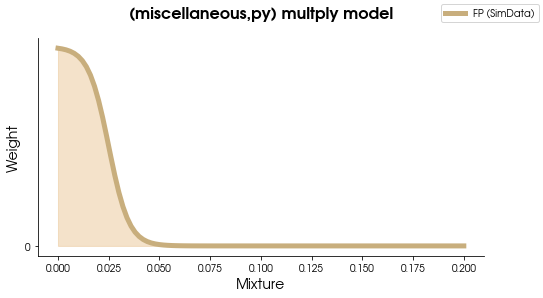

In [7]:
def TN_prior_cal(x):
    from scipy.special import expit
    return (1 - expit( 200*x - 5)) * 0.15

if __name__ == "__main__":
    import numpy as np
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt
    
    x = np.linspace(0, 0.2, 101)
    y = np.array ( [TN_prior_cal(i) for i in x] )

    fig, ax = plt.subplots (figsize = (8, 4))
    ax.set_yticks ( np.arange (0, np.max(y) * 1.1, 0.25))

    ax.set_title ( "(miscellaneous,py) multply model", fontsize = 16, fontweight='bold', color='black', pad=20)

    ax.plot (x, y, label = "FP (SimData)", linewidth = 5, color = '#C8AE7D')
    ax.fill_between(x, y, color='#EAC696', alpha=0.5)
    #ax.axvline(x = 0.02,  ymin = 0, ymax = TN_prior_cal (0.02)/plt.ylim()[1] , label = "median", linestyle='--', linewidth=2, color = 'red' )

    # 축 설정
    ax.set_xlabel("Mixture", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Weight", fontdict = {"fontsize" : 14})

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()


weight = np.array ( [0, 0.2, 0.4 ,0.6, 0.8])
print (TN_prior_cal (weight))

Text(0.5, 0, 'VAF x 2 (percent)')

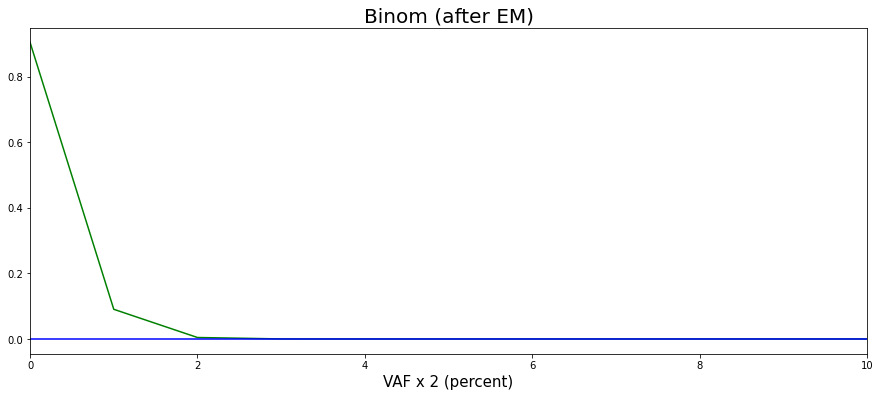

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

x = np.arange(0, 101)
n1, n2, p1, p2 = 100, 100, 0.001, 0.5
y1, y2 = scipy.stats.binom (n1  , p1).pmf(x), scipy.stats.binom (n2 , p2).pmf(x)

fig, ax = plt.subplots(figsize = (15,6)) 
ax.set_xlim( [0, 10] ) 
ax.plot (x, y1, color = "green", label = "clone1")
ax.plot (x, y2, color = "blue", label = "clone2")
ax.set_title ("Binom (after EM)", fontsize = 20)
ax.set_xlabel ("VAF x 2 (percent)", fontsize = 15)


In [14]:
import numpy as np

# Create a sample 2D numpy array with more than two rows
data = np.array([[3, 2, 5],
                 [6, 1, 4],
                 [9, 7, 8],
                 [2, 5, 1]])

data = np.array ( [[3, 2, 5]] )

# Use lexsort to sort the array by the third row, then the second row, and finally the first row
sorted_indices = np.lexsort(tuple(data))

# Use the sorted indices to rearrange the original array
sorted_data = data[:, sorted_indices]

print(sorted_data)

[[2 3 5]]


In [11]:
import numpy as np

# Create a sample 2D numpy array
data = np.array([[3, 2, 5],
                 [6, 1, 4]])

# Use lexsort to sort the array first by the second row, then by the first row
sorted_indices = np.lexsort((data[0, :], data[1, :]))

# Use the sorted indices to rearrange the original array
sorted_data = data[:, sorted_indices]

print(sorted_data)

[3 6]


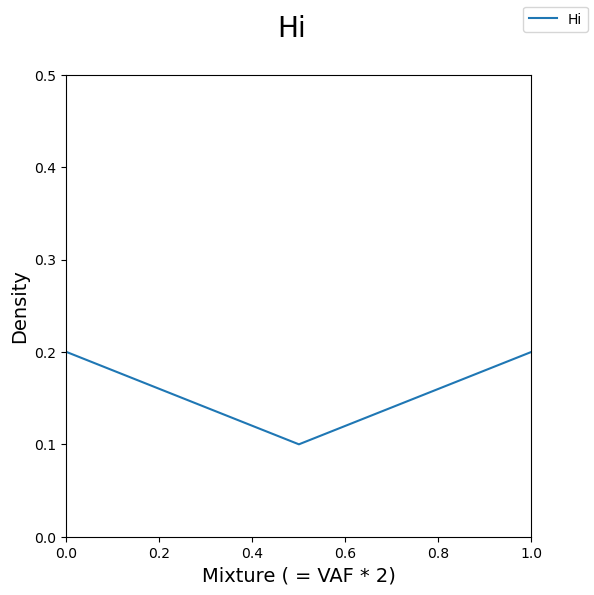

In [36]:
import matplotlib

x = [0, 0.5, 1]
y = [0.2, 0.1, 0.2]

fig, ax = matplotlib.pyplot.subplots (figsize = (6, 6))

matplotlib.rcParams["font.family"] = 'arial'
matplotlib.pyplot.style.use("default")
fig.suptitle("Hi", fontsize = 20)
ax.plot (x, y, label = "Hi")
ax.set_xlabel("Mixture ( = VAF * 2)", fontdict = {"fontsize" : 14})
ax.set_ylabel("Density", fontdict = {"fontsize" : 14})
ax.axis ( [0, 1, 0, 0.5] )
fig.legend()

# matplotlib.spines.Spines.set_visible(False)
#print (matplotlib.spines.Spines.values)
#matplotlib.spines.Spines["top"].set_visible(False)

### Scipy interpolate + extrapolate
- 2차원까지는 괜찮은데 n차원이 될까?
- 안 되면 차원축소 해야하는데 상당히 귀찮을 듯..

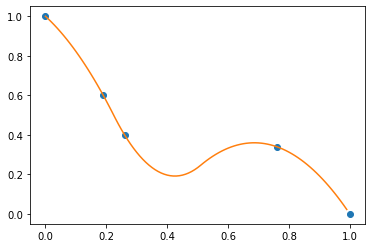

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

x = [0, 0.19, 0.26, 0.76, 1]
y = [1, 0.6, 0.4, 0.34, 0 ]
f = scipy.interpolate.interp1d(x, y, fill_value = "extrapolate", kind = "quadratic")

xnew = np.arange(0, 1, 0.01)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

### NORMAL DISTRIBUTION
- Y1 ~ N(m1, sd1), Y2 ~ N(m2, sd2) 일 때 Y

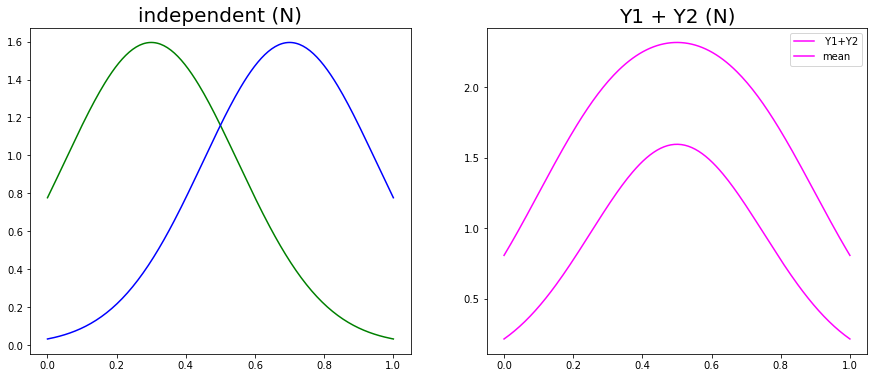

In [24]:
import scipy.stats

x = np.linspace(0,1,200)
m1, m2, sd1, sd2 = 0.3, 0.7, 0.25, 0.25
y1, y2, y3 = scipy.stats.norm (m1, sd1).pdf (x), scipy.stats.norm (m2, sd2).pdf (x), scipy.stats.norm (np.mean([m1,m2]), np.mean([sd1,sd2])).pdf (x)

fig, ax = plt.subplots(ncols = 2, figsize = (15,6)) 
ax[0].plot (x, y1, color = "green")
ax[0].plot (x, y2, color = "blue")
ax[0].set_title ("independent (N)", fontsize = 20)

ax[1].plot(x, y1+ y2, color = "magenta", label = " Y1+Y2")
ax[1].plot(x, y3, color = "magenta", label = "mean")
ax[1].set_title ("Y1 + Y2 (N)", fontsize = 20)
plt.legend()

### BINOMIAL DISTRIBUTION

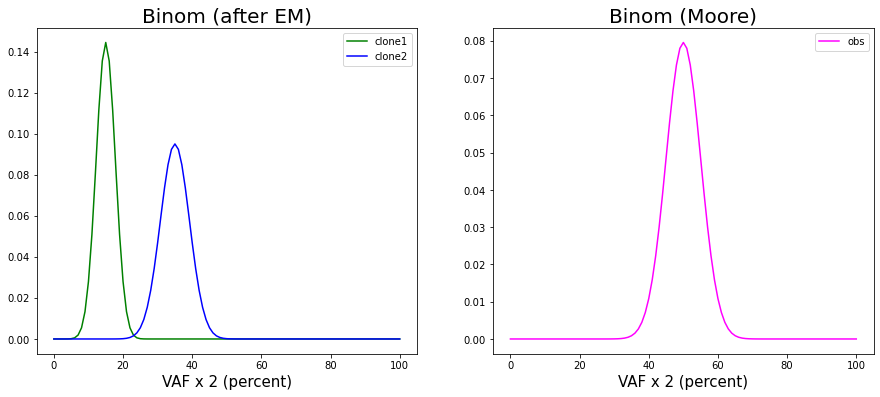

In [51]:
x = np.arange(0, 101)
n1, n2, p1, p2 = 30, 70, 0.5, 0.5
y1, y2 = scipy.stats.binom (n1  , p1).pmf(x), scipy.stats.binom (n2 , p2).pmf(x)

fig, ax = plt.subplots(ncols = 2, figsize = (15,6)) 
ax[0].plot (x, y1, color = "green", label = "clone1")
ax[0].plot (x, y2, color = "blue", label = "clone2")
ax[0].set_title ("Binom (after EM)", fontsize = 20)
ax[0].set_xlabel ("VAF x 2 (percent)", fontsize = 15)

y3 = np.zeros((n1+n2) + 1)
for i in range(len(y3)):
    y3[i] = 0
    for a1 in range(i + 1):        # distribution 1에서 기여해야 할 alt
        a2 = i - a1       # distribution 2에서 기여해야 할 alt
        try:
            y3[i] = y3[i] + (y1[a1] * y2[a2])
        except:
            continue

#ax[1].plot(x, y1+ y2, color = "magenta", label = " Y1+Y2")
ax[1].plot(x, y3, color = "magenta", label = "obs")
ax[1].set_title ("Binom (Moore)", fontsize = 20)
ax[1].set_xlabel ("VAF x 2 (percent)", fontsize = 15)
ax[0].legend(); ax[1].legend()

### BETA DISTRIBUTION

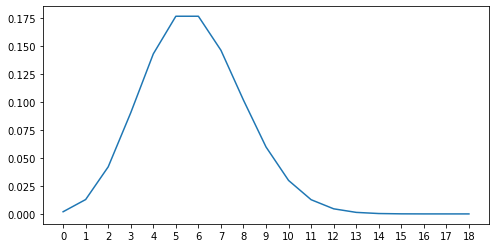

In [4]:
import scipy.stats
from scipy.stats import binom
from matplotlib import pyplot as plt
from scipy.special import beta, gamma, factorial, comb

#scipy.stats.betabinom.cdf(9, 40, a+1, b+1)
a1, b1 = 3, 16
depth = 19

x1, y1 = [i for i in range(0,depth)], []
for xx in x1:
    y1.append(scipy.stats.betabinom.pmf(xx, depth, a1+1, b1+1))

fig, ax = plt.subplots (figsize = (8, 4))
ax.plot(x1, y1)
ax.set_xticks ( x1 )




In [4]:
import scipy.stats
from scipy.stats import binom
from matplotlib import pyplot as plt
from scipy.special import beta, gamma, factorial, comb

p1 = round ( scipy.stats.betabinom.pmf(5, 19, 6, 15 ) , 2)
p2 = round ( scipy.stats.betabinom.pmf(5, 19, 8, 13) , 2)

p3 = round ( scipy.stats.betabinom.pmf(50, 190, 61, 181 ) , 2)
p4 = round ( scipy.stats.betabinom.pmf(50, 190, 81, 161) , 2)

print ("p1 = {}\tp2 = {}".format(p1, p2 ))
print ("p3 = {}\tp4 = {}".format(p3, p4 ))


p1 = 0.15	p2 = 0.11
p3 = 0.05	p4 = 0.01


<Figure size 864x288 with 0 Axes>

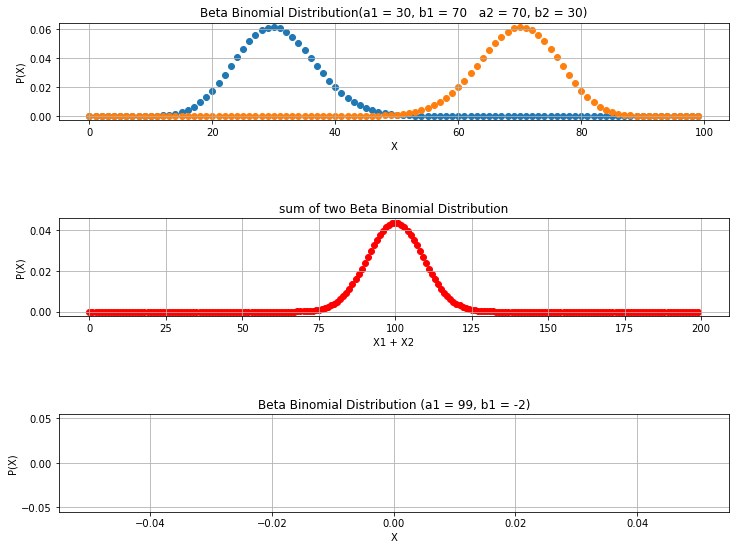

In [37]:
import scipy.stats
from scipy.stats import binom
from matplotlib import pyplot as plt
from scipy.special import beta, gamma, factorial, comb

#scipy.stats.betabinom.cdf(9, 40, a+1, b+1)
a1, b1 = 30, 70
a2, b2 = 70, 30

depth1 = depth2 = 100

x1, x2 = [i for i in range(0,depth1)], [i for i in range(0,depth2)]
y1, y2 = [], []

for xx in x1:
    y1.append(scipy.stats.betabinom.pmf(xx, depth1, a1+1, b1+1))
for xx in x2:
    y2.append(scipy.stats.betabinom.pmf(xx, depth2, a2+1, b2+1))
    
x3 = [i for i in range(0,int((depth1 + depth2)/2))]
y4 = []     # y4 : 그냥 단순히 a = a1 + a2, b = b1 + b2로 계산

for xx in x3:
    y4.append(scipy.stats.betabinom.pmf(xx, int((depth1 + depth2)/2), a1+a2+2, int((depth1 + depth2)/2) - (a1+a2+2)) )

    

plt.figure(figsize=(12, 4))

fig, ax = plt.subplots(ncols = 1,nrows = 3, figsize = (12,9)) 
fig.subplots_adjust(hspace=1)
for i in range(0,3):
    ax[i].grid()

ax[0].scatter(x1, y1)
ax[0].scatter(x2, y2)
ax[0].set_xlabel('X')
ax[0].set_ylabel('P(X)')
ax[0].set_title(f'Beta Binomial Distribution(a1 = {a1}, b1 = {b1}   a2 = {a2}, b2 = {b2})')


y3 = np.zeros(depth1 + depth2)
for x in range(1, depth1 + depth2):
    p = 0
    for x1 in range (1, x):
        x2 = x - x1
        try:
            p = p + (y1[x1] * y2[x2])             # y3 : x1 + x2 = x 인 조합을 모두 계싼
        except:
            p = p
    y3[x] = p
ax[1].scatter([i for i in range(0,depth1 + depth2)] ,y3, color = "red")
ax[1].set_xlabel ("X1 + X2")
ax[1].set_ylabel ("P(X)")
ax[1].set_title(f'sum of two Beta Binomial Distribution')


ax[2].scatter(x3,y4)
ax[2].set_xlabel ("X")
ax[2].set_ylabel ("P(X)")
ax[2].set_title(f'Beta Binomial Distribution (a1 = {a1 + a2 - 1}, b1 = {int((depth1 + depth2)/2) - (a1+a2+2)})')

plt.show()
